In [37]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib
%matplotlib widget
import jmkfigure
import xmitgcm


In [38]:
!mkdir Movie13
!rm Movie13/*

mkdir: Movie13: File exists


In [39]:
taumax = 0.225  # N/m^2
t = np.arange(407*1.0)  # hours
taut = 0 * t
taut[t<=24] = np.arange(25) / 24 * taumax
taut[(t>24) & (t<(5*24))] = taumax
taut[(t>=5*24) & (t<6*24)] = np.arange(23, -1, -1) / 24 * taumax


/Users/jklymak/anaconda3/envs/ButeWind/lib/python3.10/site-packages/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':


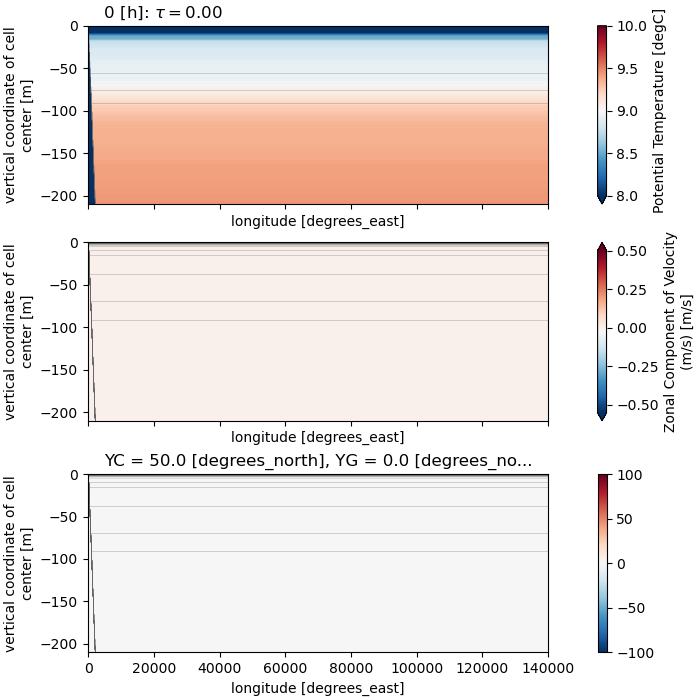

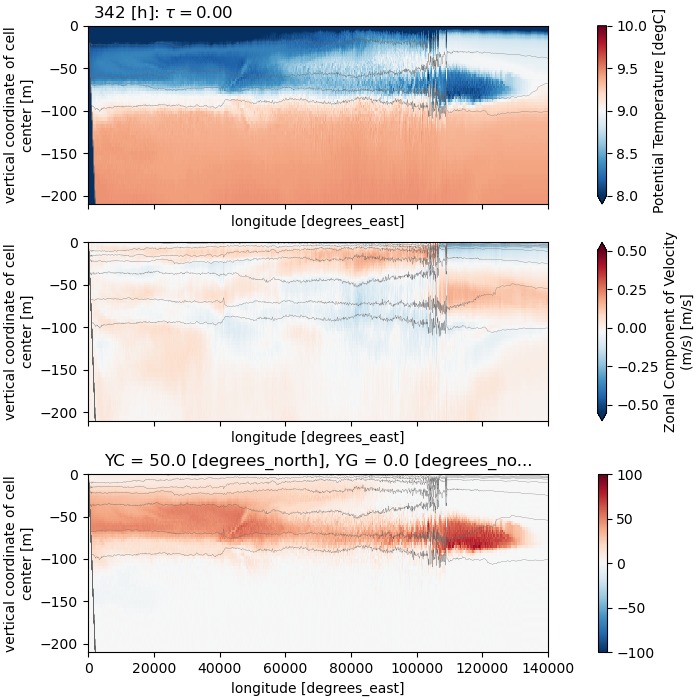

In [43]:
with xmitgcm.open_mdsdataset('../results/Bute13/input/', endian='<', 
                             iters=np.arange(0*3600, 343*3600, 3600)) as ds0:
    ds0=ds0.isel(YC=0, YG=0)
    ds0 = ds0.rename({'TRAC01':'O2', 'TRAC02':'O2noEx'})
    T0 = ds0.isel(time=0).THETA[:, -1]
    
    for i in [0, 342]:
        ds = ds0.isel(time=i)
        ds['pden'] = ds.THETA * -0.2 + ds.SALT * 0.75
        ds['dT'] = ds.THETA - T0
        fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 7))
        
        ds.THETA.plot.pcolormesh(ax=ax[0], vmin=8.0, vmax=10, cmap='RdBu_r')
        #ds.dT.plot.pcolormesh(ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r')

        ds.pden.plot.contour(ax=ax[0], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]), linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

        ds.UVEL.plot.pcolormesh(ax=ax[1], vmin=0.5, vmax=-0.5, cmap='RdBu_r')

        ds.pden.plot.contour(ax=ax[1], levels=np.arange(10, 22, 1/3),linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

        #ds.O2.plot.pcolormesh(ax=ax[2], vmin=0, vmax=350, cmap='turbo')
        (ds.O2-ds.O2noEx).plot.pcolormesh(ax=ax[2], vmin=-100, vmax=100, cmap='RdBu_r')
        ds.pden.plot.contour(ax=ax[2], levels=np.arange(10, 22, 1/3),linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

        
            
        ax[1].set_title('')
        ax[0].set_title('')

        ax[0].set_title(f'{i:4d} [h]: $\\tau = {taut[i]:2.2f}$', loc='left')
        ax[0].set_xlim([-100, 140000])

        ax[0].set_ylim([-210, 0])
        fig.savefig(f'Movie13/frame{i:04d}.png')
        # plt.close(fig)


/Users/jklymak/anaconda3/envs/ButeWind/lib/python3.10/site-packages/xmitgcm/mds_store.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':


<xarray.DataArray 'THETA' (Z: 100)>
dask.array<getitem, shape=(100,), dtype=float64, chunksize=(100,), chunktype=numpy.ndarray>
Coordinates: (12/22)
    XC       float64 3.855e+05
    YC       float64 50.0
    YG       float64 0.0
  * Z        (Z) float64 -0.5 -1.514 -2.555 -3.625 ... -469.6 -483.4 -497.6
    rA       float64 dask.array<chunksize=(), meta=np.ndarray>
    dxG      float64 dask.array<chunksize=(), meta=np.ndarray>
    ...       ...
    rLowS    float64 dask.array<chunksize=(), meta=np.ndarray>
    rhoRef   (Z) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    rSurfC   float64 dask.array<chunksize=(), meta=np.ndarray>
    rLowC    float64 dask.array<chunksize=(), meta=np.ndarray>
    iter     int64 dask.array<chunksize=(), meta=np.ndarray>
    time     timedelta64[ns] 00:00:00
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC
<xarray.Dataset>
Dimensions:  (XC: 1280, XG: 1280, Z: 100, Zp1: 101, Zu: 100, Zl: 100

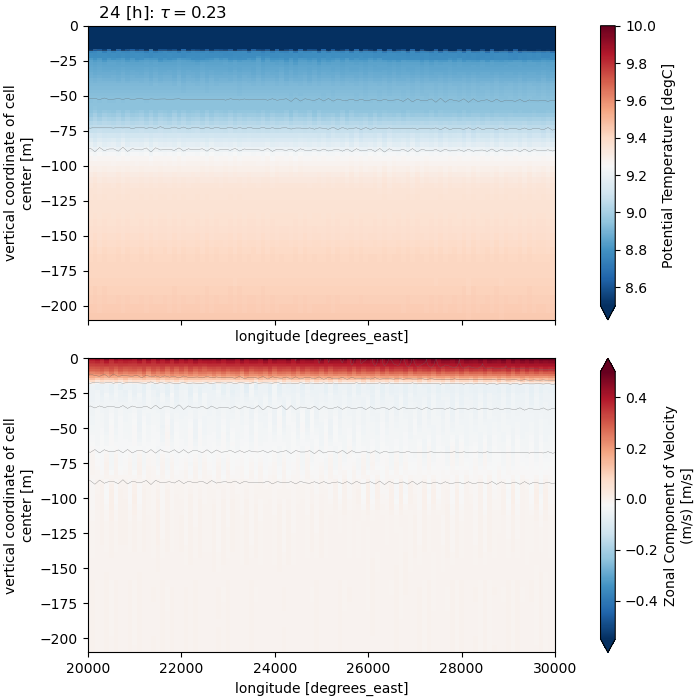

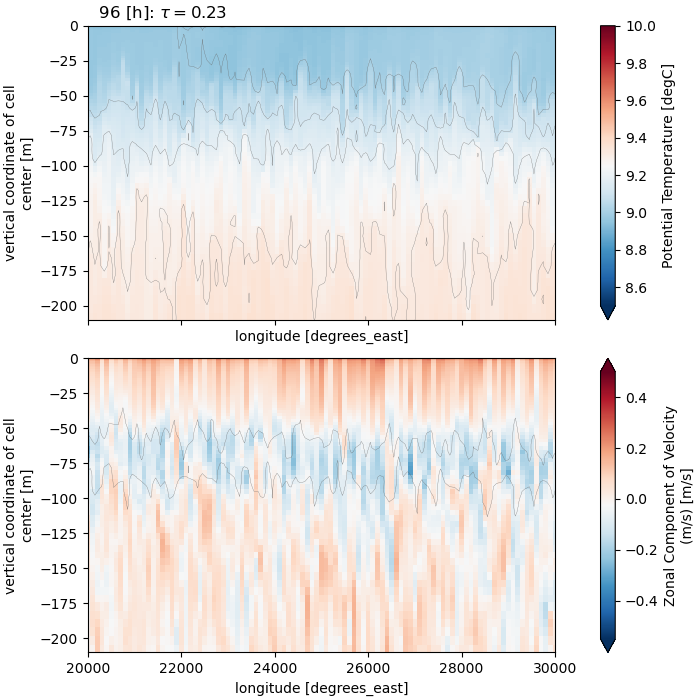

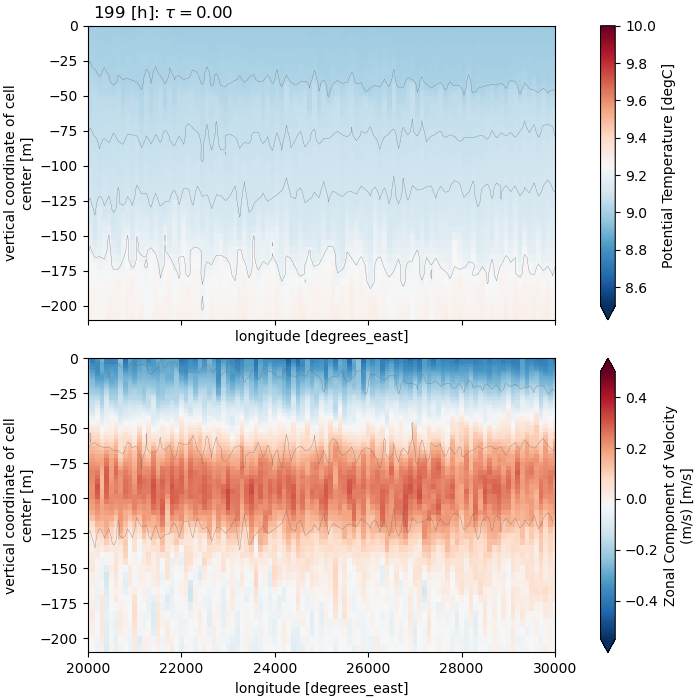

In [10]:
with xmitgcm.open_mdsdataset('../results/Bute09/input/', endian='<', 
                             iters=np.arange(0*3600, 200*3600, 3600)) as ds0:
    ds0=ds0.isel(YC=0, YG=0)
    T0 = ds0.isel(time=0).THETA[:, -1]
    print(T0)
    print(ds0)
    
    for i in [24, 96, 199]:
        ds = ds0.isel(time=i)
        ds['pden'] = ds.THETA * -0.2 + ds.SALT * 0.75
        ds['dT'] = ds.THETA - T0
        fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 7))
        
        ds.THETA.plot.pcolormesh(ax=ax[0], vmin=8.5, vmax=10, cmap='RdBu_r')
        #ds.dT.plot.pcolormesh(ax=ax[0], vmin=-1, vmax=1, cmap='RdBu_r')

        ds.pden.plot.contour(ax=ax[0], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]), linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

        ds.UVEL.plot.pcolormesh(ax=ax[1], vmin=0.5, vmax=-0.5, cmap='RdBu_r', rasterized=True)

        ds.pden.plot.contour(ax=ax[1], levels=np.arange(10, 22, 1/3),linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

        ax[1].set_title('')
        ax[0].set_title('')

        ax[0].set_title(f'{i:4d} [h]: $\\tau = {taut[i]:2.2f}$', loc='left')
        ax[0].set_xlim([20000, 30000])

        ax[0].set_ylim([-210, 0])
        #fig.savefig(f'Movie09/frame{i:04d}.png')
        #plt.close(fig)
        

In [ ]:
fig, ax = plt.subplots()
ds.dT.plot(ax=ax, vmin=-1, vmax=1)

In [ ]:
matplotlib.use('agg')
with xmitgcm.open_mdsdataset('../results/Bute07/input/', endian='<', iters=np.arange(0, 10*3600, 3600)) as ds0:
    ds0=ds0.isel(YC=0, YG=0)
    print(ds0)
    
    for i in range(3,4):
        ds = ds0.isel(time=i)
        ds['pden'] = ds.THETA * -0.2 + ds.SALT * 0.75
        
        fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 7))
        
        ds.THETA.plot.pcolormesh(ax=ax[0], vmin=2+8, vmax=-2+8, cmap='RdBu_r')
        ds.pden.plot.contour(ax=ax[0], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]), linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))


        ds.UVEL.plot.pcolormesh(ax=ax[1], vmin=0.5, vmax=-0.5, cmap='RdBu_r')

        ds.pden.plot.contour(ax=ax[1], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]),linewidths=0.2, colors='0.4')
                                           # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

        ax[1].set_title('')

        ax[0].set_title('')

        ax[0].set_title(f'{i:4d} [h]: $\\tau = {taut[i]:2.2f}$', loc='left')
        #ax[0].set_xlim([-100, 75000])

        ax[0].set_ylim([-210, 0])
        fig.savefig(f'Movie07/frame{i:04d}.png')
    

In [ ]:
!mkdir Movie04
matplotlib.use('agg')
ds0 = xmitgcm.open_mdsdataset('../results/Bute04/input/', endian='<', iters=np.arange(0, 1207800, 3600))
ds0=ds0.isel(YC=0, YG=0)
print(ds0)
for i in range(len(ds0.time)):
    print(i)
    ds = ds0.isel(time=i)
    ds['pden'] = ds.THETA * -0.2 + ds.SALT * 0.75

    fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 7))

    ds.THETA.plot.pcolormesh(ax=ax[0], vmin=7, vmax=10, cmap='RdBu_r')
    ds.pden.plot.contour(ax=ax[0], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]), linewidths=0.2, colors='0.4')
                                       # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))


    ds.UVEL.plot.pcolormesh(ax=ax[1], vmin=0.5, vmax=-0.5, cmap='RdBu_r')

    ds.pden.plot.contour(ax=ax[1], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]),linewidths=0.2, colors='0.4')
                                       # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

    ax[1].set_title('')

    ax[0].set_title('')

    ax[0].set_title(f'{i:4d} [h]: $\\tau = {taut[i]:2.2f}$', loc='left')
    ax[0].set_xlim([-100, 75000])

    ax[0].set_ylim([-210, 0])
    fig.savefig(f'Movie04/frame{i:04d}.png')
    plt.close(fig)
    

In [ ]:
!mkdir Movie06
matplotlib.use('agg')
ds0 = xmitgcm.open_mdsdataset('../results/Bute06/input/', endian='<', iters=np.arange(0*3600, 407*3600, 3600))
ds0=ds0.isel(YC=0, YG=0)
print(ds0)
for i in range(len(ds0.time)):
    print(i)
    ds = ds0.isel(time=i)
    ds['pden'] = ds.THETA * -0.2 + ds.SALT * 0.75

    fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 7))

    ds.THETA.plot.pcolormesh(ax=ax[0], vmin=7, vmax=10, cmap='RdBu_r')
    ds.pden.plot.contour(ax=ax[0], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]), linewidths=0.2, colors='0.4')
                                       # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))


    ds.UVEL.plot.pcolormesh(ax=ax[1], vmin=0.5, vmax=-0.5, cmap='RdBu_r')

    ds.pden.plot.contour(ax=ax[1], levels=np.array([10, 15, 20, 20.5, 20.75, 21, 21.25]),linewidths=0.2, colors='0.4')
                                       # levels=np.array([15, 20, 25, 26, 27, 28, 29, 29.25, 29.5, 29.75, 30, 30.05, 30.1, 30.2, 30.3]))

    ax[1].set_title('')

    ax[0].set_title('')

    ax[0].set_title(f'{i:4d} [h]: $\\tau = {taut[i]:2.2f}$', loc='left')
    ax[0].set_xlim([-100, 75000])

    ax[0].set_ylim([-210, 0])
    fig.savefig(f'Movie06/frame{i:04d}.png')
    plt.close(fig)
    

In [ ]:
!open Movie04

In [ ]:
!open Movie02/

In [ ]:
with xmitgcm.open_mdsdataset('../results/Bute02/input/', endian='<', iters=0 ) as ds:
    ds=ds.isel(YC=0, YG=0, XC=1)
    
    fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, constrained_layout=False, figsize=(5, 7))
    ax[0].plot(ds.SALT.T, ds.Z)
    ax[0].set_ylim([-200, 0])

   

In [ ]:
import pandas as pd
df = pd.read_csv('TempSal.csv')
print(df)
df.Depth